In [65]:
import solaris as sol
from solaris.data import data_dir
import os
import skimage
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import numpy as np

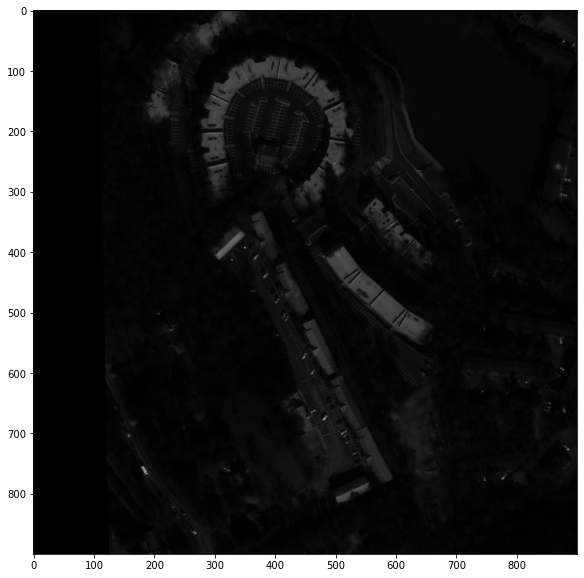

In [39]:
image = rio.open(os.path.join(atlanta_data_dir, 'SN4_buildings_train_AOI_6_Atlanta_nadir7_catid_1030010003D22F00_PS-RGBNIR_732701_3725589.tif'))
f, axarr = plt.subplots(figsize=(10, 10))
plt.imshow(image.read(1), cmap='gray')

In [35]:
gdf = gpd.read_file(os.path.join(atlanta_data_dir, 'D:/SpaceNet_TrainData/train/AOI_2_Vegas/geojson_buildings/SN2_buildings_train_AOI_2_Vegas_geojson_buildings_img5429.geojson'))
cascaded_union(gdf.geometry.values)

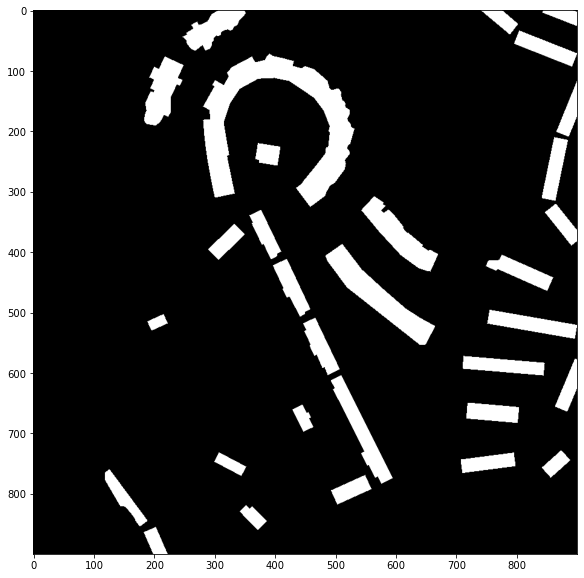

In [43]:
fp_mask = sol.vector.mask.footprint_mask(df=os.path.join(atlanta_data_dir, 'geojson_buildings/SN4_buildings_train_AOI_6_Atlanta_geojson_buildings_732701_3725589.geojson'),
                                      reference_im=os.path.join(atlanta_data_dir, 'SN4_buildings_train_AOI_6_Atlanta_nadir7_catid_1030010003D22F00_PS-RGBNIR_732701_3725589.tif'))
f, ax = plt.subplots(figsize=(10, 10))
plt.imshow(fp_mask, cmap='gray')
from PIL import Image
img = Image.fromarray(fp_mask)
img.save(os.path.join(atlanta_masks, 'mask_1.png'))

In [9]:
vegas_data_dir = 'D:/SpaceNet_TrainData/train/AOI_2_Vegas/'
atlanta_data_dir = 'D:/SpaceNet_TrainData/train/AOI_6_Atlanta/'

atlanta_masks = 'D:/SpaceNet_TrainData/train/AOI_6_Atlanta/masks'
vegas_masks = 'D:/SpaceNet_TrainData/train/AOI_2_Vegas/masks'

In [ ]:
# Create Vegas masks
for file in sorted(os.listdir(vegas_data_dir)):

    geodf_dir = vegas_data_dir + 'geojson_buildings/'+'SN2_buildings_train_AOI_2_Vegas_geojson_buildings' + file[38:-3] + 'geojson'
    fp_mask = sol.vector.mask.footprint_mask(df=geodf_dir,
                                      reference_im=os.path.join(vegas_data_dir, file))
    img = Image.fromarray(fp_mask)
    img.save(os.path.join(vegas_masks, 'SN2_buildings_train_AOI_2_Vegas_mask_buildings' + file[38:-3] + 'png'))

#SN2_buildings_train_AOI_2_Vegas_PS-RGB_img1.tif

In [ ]:
# Create Atlanta masks
for file in sorted(os.listdir(atlanta_data_dir)):    
    geodf_dir = atlanta_data_dir + 'geojson_buildings/'+'SN4_buildings_train_AOI_6_Atlanta_geojson_buildings' + file[73:-3] + 'geojson'
    fp_mask = sol.vector.mask.footprint_mask(df=geodf_dir,
                                      reference_im=os.path.join(atlanta_data_dir, file))
    img = Image.fromarray(fp_mask)
    img.save(os.path.join(atlanta_masks, 'SN4_buildings_train_AOI_6_Atlanta_mask_buildings' + file[73:-3] + 'png'))

#SN4_buildings_train_AOI_6_Atlanta_nadir7_catid_1030010003D22F00_PS-RGBNIR_732701_3720639.tif

# Convert RGBNIR to RGB

In [88]:
'''def save_rgb_img(raster_img, out_dir):
    with rio.open(raster_img) as img:
        red = img.read(1)
        green = img.read(2)
        blue = img.read(3)
    rgb = np.dstack((red, green, blue))
    rgb = (255.0 / rgb.max() * (rgb - rgb.min())).astype(np.uint8)
    img = Image.fromarray(rgb)
    img.save(os.path.join(out_dir, raster_img[:-4] + '.png'))
    '''

In [ ]:
'''out_dir = 'D:/SpaceNet_TrainData/train/AOI_2_Vegas/Vegas_RGB'
for img in os.listdir('D:/SpaceNet_TrainData/train/AOI_2_Vegas/'):
    save_rgb_img('D:/SpaceNet_TrainData/train/AOI_2_Vegas/'+img, out_dir)'''

In [ ]:
'''for file in os.listdir(vegas_data_dir):
    if file[-1] == 'g':
        os.replace("D:/SpaceNet_TrainData/train/AOI_2_Vegas/"+file, "D:/SpaceNet_TrainData/train/Vegas_RGB/"+file)
'''

In [87]:
'''from PIL import Image, ImageEnhance
#Enhance rgb
for file in os.listdir('D:/SpaceNet_TrainData/train/RGB_format'):
    ## Enhance the light
    img = Image.open('D:/SpaceNet_TrainData/train/RGB_format/' + file)
    enhancer = ImageEnhance.Brightness(img)
    factor = 3 #gives original image
    im_output = enhancer.enhance(factor)
    im_output.save('D:/SpaceNet_TrainData/train/RGB_format/'+ file)

#################################################'''

# Reference:
- https://solaris.readthedocs.io/en/latest/tutorials/notebooks/api_masks_tutorial.html